In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from AST425 import *

2025-04-13 13:02:09.834450: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-13 13:02:09.836359: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-13 13:02:09.843992: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-13 13:02:09.870773: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744563729.916868  170371 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744563729.93

In [2]:
#shape of VAE is 38, 100, 100, 2, 100, 100 38

In [3]:
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['legend.fontsize'] = 13

In [4]:
data = pd.read_csv('../tsne_umap_tutorials/data/APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

# data = pd.read_csv('APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

In [5]:
# Spatial:
ra = data["RA"]   #APOGEE
dec = data["DEC"]   #APOGEE

# Identification:
apogee_ID = data["# APOGEE_ID_"]   #APOGEE
gaia_ID = data["GAIAEDR3_SOURCE_ID"]  # Gaia

# Kinematic:
parallax = data["GAIAEDR3_PARALLAX"]  # Gaia
pmra = data["GAIAEDR3_PMRA"]  # Gaia
pmra_err = data["GAIAEDR3_PMRA_ERROR"]  # Gaia
pmdec = data["GAIAEDR3_PMDEC"]  # Gaia
pmdec_err = data["GAIAEDR3_PMDEC_ERROR"]  # Gaia
RV = data["VHELIO_AVG"]   #APOGEE
RV_err = data["VERR"]   #APOGEE
#dist = data["dist"]   #APOGEE no dist in this dataset?
#dist_err = data["dist_err"]   #APOGEE
jr = data["jr"]   #APOGEE
jr_err = data["jr_err"]   #APOGEE
jz = data["jz"]   #APOGEE
jz_err = data["jz_err"]   #APOGEE
#jphi = data["jphi"]   #APOGEE no jphi in this dataset?
#jphi_err = data["jphi_err"]    #APOGEE

# # Spectral (useful for filtering):
TEFF_ERR = data["TEFF_ERR"]   #APOGEE
TEFF = data["TEFF"]   #APOGEE
LOGG_ERR = data["LOGG_ERR"]   #APOGEE
LOGG = data["LOGG"]   #APOGEE
SNR = data["SNR"]   #APOGEE
ASPCAPFLAG = data["ASPCAPFLAG"]
STARFLAG = data["STARFLAG"]

# # Chemical abundances from astroNN:
FE_H = data['FE_H'] 
C_FE = data['C_FE']
CI_FE = data['CI_FE']
N_FE = data['N_FE']
O_FE = data['O_FE']
MG_FE = data['MG_FE']
AL_FE = data['AL_FE']
SI_FE = data['SI_FE']
P_FE = data['P_FE']
S_FE = data['S_FE']
K_FE = data['K_FE']
CA_FE = data['CA_FE']
TI_FE = data['TI_FE']
TIII_FE = data['TIII_FE']
V_FE = data['V_FE']
CR_FE = data['CR_FE']
MN_FE = data['MN_FE']
CO_FE = data['CO_FE']
NI_FE = data['NI_FE']

# # Chemical abundance errors from astroNN:
FE_H_err = data["FE_H_ERR"] 
C_FE_err = data['C_FE_ERR']
CI_FE_err = data['CI_FE_ERR']
N_FE_err = data['N_FE_ERR']
O_FE_err = data['O_FE_ERR']
MG_FE_err = data['MG_FE_ERR']
AL_FE_err = data['AL_FE_ERR']
SI_FE_err = data['SI_FE_ERR']
P_FE_err = data['P_FE_ERR']
S_FE_err = data['S_FE_ERR']
K_FE_err = data['K_FE_ERR']
CA_FE_err = data['CA_FE_ERR']
TI_FE_err = data['TI_FE_ERR']
TIII_FE_err = data['TIII_FE_ERR']
V_FE_err = data['V_FE_ERR']
CR_FE_err = data['CR_FE_ERR']
MN_FE_err = data['MN_FE_ERR']
CO_FE_err = data['CO_FE_ERR']
NI_FE_err = data['NI_FE_ERR']

# # Number of stars in the initial sample of APOGEE DR16: 
print("There are {} stars in our initial sample".format(len(ra)))

cols = [ra, dec, apogee_ID, gaia_ID, parallax, pmra, pmra_err, pmdec, pmdec_err, RV, RV_err, #dist, dist_err,
         jr, jr_err,# jphi, jphi_err,
        jz, jz_err, TEFF, TEFF_ERR, LOGG, LOGG_ERR, SNR, ASPCAPFLAG, STARFLAG, FE_H, FE_H_err, C_FE, 
         C_FE_err, CI_FE, CI_FE_err, N_FE, N_FE_err, O_FE, O_FE_err, MG_FE, MG_FE_err, AL_FE, AL_FE_err, SI_FE,
         SI_FE_err, P_FE, P_FE_err, S_FE, S_FE_err, K_FE, K_FE_err, CA_FE, CA_FE_err, TI_FE, TI_FE_err, TIII_FE,
         TIII_FE_err, V_FE, V_FE_err, CR_FE, CR_FE_err, MN_FE, MN_FE_err, CO_FE, CO_FE_err, NI_FE, NI_FE_err]

There are 370060 stars in our initial sample


In [6]:
aspcapflags_filter = np.array(cols[20])==0
starflags_filter = np.array(cols[21])==0

filters = aspcapflags_filter*starflags_filter


filtered_data = []
for c in cols:
    a = np.array(c)[filters]
    filtered_data.append(a)
    
print("There are {} stars in our filtered sample".format(len(filtered_data[0])))

There are 144767 stars in our filtered sample


In [7]:
FE_H_filtered, C_FE_filtered, CI_FE_filtered = filtered_data[22], filtered_data[24], filtered_data[26]
N_FE_filtered, O_FE_filtered, MG_FE_filtered = filtered_data[28], filtered_data[30], filtered_data[32]
AL_FE_filtered, SI_FE_filtered, P_FE_filtered = filtered_data[34], filtered_data[36], filtered_data[38]
S_FE_filtered, K_FE_filtered, CA_FE_filtered = filtered_data[40], filtered_data[42], filtered_data[44]
TI_FE_filtered, TIII_FE_filtered, V_FE_filtered = filtered_data[46], filtered_data[48], filtered_data[50]
CR_FE_filtered, MN_FE_filtered, CO_FE_filtered, NI_FE_filtered = filtered_data[52], filtered_data[54], filtered_data[56], filtered_data[58]
RV_filtered  = filtered_data[9]

In [8]:
FE_H_err, C_FE_err, CI_FE_err = filtered_data[23], filtered_data[25], filtered_data[27]
N_FE_err, O_FE_err, MG_FE_err = filtered_data[29], filtered_data[31], filtered_data[33]
AL_FE_err, SI_FE_err, P_FE_err = filtered_data[35], filtered_data[37], filtered_data[39]
S_FE_err, K_FE_err, CA_FE_err = filtered_data[41], filtered_data[43], filtered_data[45]
TI_FE_err, TIII_FE_err, V_FE_err = filtered_data[47], filtered_data[49], filtered_data[51]
CR_FE_err, MN_FE_err, CO_FE_err, NI_FE_err = filtered_data[53], filtered_data[55], filtered_data[57], filtered_data[59]
RV_err  = filtered_data[10]

In [9]:
train_size = round(0.8 * len(filtered_data[0]))
test_size = round(0.1 * len(filtered_data[0]))
validation_size = round(0.1 * len(filtered_data[0]))

training_labels_raw = np.transpose(np.array([FE_H_filtered[:train_size], C_FE_filtered[:train_size], CI_FE_filtered[:train_size], 
                                        N_FE_filtered[:train_size], O_FE_filtered[:train_size], MG_FE_filtered[:train_size],
                                        AL_FE_filtered[:train_size], SI_FE_filtered[:train_size], P_FE_filtered[:train_size],
                                        S_FE_filtered[:train_size], K_FE_filtered[:train_size], CA_FE_filtered[:train_size],
                                        TI_FE_filtered[:train_size], TIII_FE_filtered[:train_size], V_FE_filtered[:train_size], 
                                        CR_FE_filtered[:train_size], MN_FE_filtered[:train_size], CO_FE_filtered[:train_size], NI_FE_filtered[:train_size]]))

error_training_labels_raw = np.transpose(np.array([FE_H_err[:train_size], C_FE_err[:train_size], CI_FE_err[:train_size], 
                                        N_FE_err[:train_size], O_FE_err[:train_size], MG_FE_err[:train_size],
                                        AL_FE_err[:train_size], SI_FE_err[:train_size], P_FE_err[:train_size],
                                        S_FE_err[:train_size], K_FE_err[:train_size], CA_FE_err[:train_size],
                                        TI_FE_err[:train_size], TIII_FE_err[:train_size], V_FE_err[:train_size], 
                                        CR_FE_err[:train_size], MN_FE_err[:train_size], CO_FE_err[:train_size], NI_FE_err[:train_size]]))


test_labels_raw = np.transpose(np.array([FE_H_filtered[train_size: train_size + test_size], C_FE_filtered[train_size: train_size + test_size], 
                                     CI_FE_filtered[train_size: train_size + test_size], N_FE_filtered[train_size: train_size + test_size],
                                     O_FE_filtered[train_size: train_size + test_size], MG_FE_filtered[train_size: train_size + test_size],
                                        AL_FE_filtered[train_size: train_size + test_size], SI_FE_filtered[train_size: train_size + test_size], 
                                     P_FE_filtered[train_size: train_size + test_size], S_FE_filtered[train_size: train_size + test_size], 
                                     K_FE_filtered[train_size: train_size + test_size], CA_FE_filtered[train_size: train_size + test_size],
                                        TI_FE_filtered[train_size: train_size + test_size], TIII_FE_filtered[train_size: train_size + test_size], 
                                     V_FE_filtered[train_size: train_size + test_size], CR_FE_filtered[train_size: train_size + test_size], 
                                     MN_FE_filtered[train_size: train_size + test_size], CO_FE_filtered[train_size: train_size + test_size], 
                                     NI_FE_filtered[train_size: train_size + test_size]]))
                                     
                                     
error_test_labels_raw = np.transpose(np.array([FE_H_err[train_size: train_size + test_size], C_FE_err[train_size: train_size + test_size], CI_FE_err[train_size: train_size + test_size], 
                                        N_FE_err[train_size: train_size + test_size], O_FE_err[train_size: train_size + test_size], MG_FE_err[train_size: train_size + test_size],
                                        AL_FE_err[train_size: train_size + test_size], SI_FE_err[train_size: train_size + test_size], P_FE_err[train_size: train_size + test_size],
                                        S_FE_err[train_size: train_size + test_size], K_FE_err[train_size: train_size + test_size], CA_FE_err[train_size: train_size + test_size],
                                        TI_FE_err[train_size: train_size + test_size], TIII_FE_err[train_size: train_size + test_size], V_FE_err[train_size: train_size + test_size], 
                                        CR_FE_err[train_size: train_size + test_size], MN_FE_err[train_size: train_size + test_size], CO_FE_err[train_size: train_size + test_size], NI_FE_err[train_size: train_size + test_size]]))


validation_labels_raw = np.transpose(np.array([FE_H_filtered[train_size + test_size: train_size + test_size + validation_size], C_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     CI_FE_filtered[train_size + test_size: train_size + test_size + validation_size], N_FE_filtered[train_size + test_size: train_size + test_size + validation_size],
                                     O_FE_filtered[train_size + test_size: train_size + test_size + validation_size], MG_FE_filtered[train_size + test_size: train_size + test_size + validation_size],
                                        AL_FE_filtered[train_size + test_size: train_size + test_size + validation_size], SI_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     P_FE_filtered[train_size + test_size: train_size + test_size + validation_size], S_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     K_FE_filtered[train_size + test_size: train_size + test_size + validation_size], CA_FE_filtered[train_size + test_size: train_size + test_size + validation_size],
                                        TI_FE_filtered[train_size + test_size: train_size + test_size + validation_size], TIII_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     V_FE_filtered[train_size + test_size: train_size + test_size + validation_size], CR_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     MN_FE_filtered[train_size + test_size: train_size + test_size + validation_size], CO_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     NI_FE_filtered[train_size + test_size: train_size + test_size + validation_size]]))
                                     
                                     
error_validation_labels_raw = np.transpose(np.array([FE_H_err[train_size + test_size: train_size + test_size + validation_size], C_FE_err[train_size + test_size: train_size + test_size + validation_size], CI_FE_err[train_size + test_size: train_size + test_size + validation_size], 
                                        N_FE_err[train_size + test_size: train_size + test_size + validation_size], O_FE_err[train_size + test_size: train_size + test_size + validation_size], MG_FE_err[train_size + test_size: train_size + test_size + validation_size],
                                        AL_FE_err[train_size + test_size: train_size + test_size + validation_size], SI_FE_err[train_size + test_size: train_size + test_size + validation_size], P_FE_err[train_size + test_size: train_size + test_size + validation_size],
                                        S_FE_err[train_size + test_size: train_size + test_size + validation_size], K_FE_err[train_size + test_size: train_size + test_size + validation_size], CA_FE_err[train_size + test_size: train_size + test_size + validation_size],
                                        TI_FE_err[train_size + test_size: train_size + test_size + validation_size], TIII_FE_err[train_size + test_size: train_size + test_size + validation_size], V_FE_err[train_size + test_size: train_size + test_size + validation_size], 
                                        CR_FE_err[train_size + test_size: train_size + test_size + validation_size], MN_FE_err[train_size + test_size: train_size + test_size + validation_size], CO_FE_err[train_size + test_size: train_size + test_size + validation_size], NI_FE_err[train_size + test_size: train_size + test_size + validation_size]]))


In [10]:
full_training_labels_raw = np.c_[training_labels_raw, error_training_labels_raw]
full_test_labels_raw = np.c_[test_labels_raw, error_test_labels_raw]
full_validation_labels_raw = np.c_[validation_labels_raw, error_validation_labels_raw]

In [11]:
full_training_labels_raw.shape, full_test_labels_raw.shape, full_validation_labels_raw.shape

((115814, 38), (14477, 38), (14476, 38))

In [12]:
np.min(full_training_labels_raw.T, axis=1), np.max(full_training_labels_raw.T, axis=1)

(array([-1.951497  , -2.1234312 , -2.119044  , -0.18978369, -0.7124527 ,
        -0.15558027, -0.47890055, -0.15707995, -0.97891414, -0.6047195 ,
        -2.2741165 , -0.40278423, -1.2907453 , -0.6157368 , -1.1658391 ,
        -1.391077  , -0.64225805, -3.6896837 , -0.2965148 ,  0.01358107,
         0.01762647,  0.02378747,  0.01708818,  0.01984493,  0.02071843,
         0.02232191,  0.01871411,  0.05818468,  0.01897749,  0.03516773,
         0.02518716,  0.02486172,  0.02255343,  0.0375476 ,  0.02254345,
         0.02762588,  0.01909786,  0.02221127]),
 array([5.7460123e-01, 8.3517190e-01, 5.6674075e-01, 3.6616602e+00,
        5.5585840e-01, 5.1025960e-01, 4.8934165e-01, 4.5210746e-01,
        7.5247210e+00, 9.0582700e-01, 1.0242985e+00, 2.7282690e-01,
        5.9501344e-01, 8.7636330e-01, 8.6697330e-01, 3.3210137e-01,
        3.5304812e-01, 5.6587050e-01, 2.1270613e-01, 4.5790780e-01,
        1.2761971e+00, 1.6784387e+00, 1.8850280e+01, 5.6260234e-01,
        5.5715760e-01, 6.7058295

In [13]:
err_threshold = 3 # remove errors that are larger than this...
err_mask_train = np.all(np.abs(full_training_labels_raw) < err_threshold, axis=1)
err_mask_test = np.all(np.abs(full_test_labels_raw) < err_threshold, axis=1)
err_mask_validation = np.all(np.abs(full_validation_labels_raw) < err_threshold, axis=1)

Remove unreasonably huge errors bars or unphysical abundance estimates:

In [14]:
full_training_labels = full_training_labels_raw[err_mask_train]
full_test_labels = full_test_labels_raw[err_mask_test]
full_validation_labels = full_validation_labels_raw[err_mask_validation]

In [15]:
full_training_labels.shape, full_test_labels.shape, full_validation_labels.shape

((114885, 38), (14374, 38), (14326, 38))

In [16]:
np.min(full_training_labels.T, axis=1), np.max(full_training_labels.T, axis=1)

(array([-1.8320073 , -1.2602895 , -2.119044  , -0.18978369, -0.7124527 ,
        -0.1388877 , -0.47890055, -0.13207644, -0.97891414, -0.5242982 ,
        -0.7713039 , -0.40278423, -1.2907453 , -0.6157368 , -1.1658391 ,
        -1.0536897 , -0.64225805, -1.1330373 , -0.2965148 ,  0.01358107,
         0.01762647,  0.02378747,  0.01708818,  0.01984493,  0.02071843,
         0.02232191,  0.01871411,  0.05818468,  0.01897749,  0.03516773,
         0.02518716,  0.02486172,  0.02255343,  0.0375476 ,  0.02254345,
         0.02762588,  0.01909786,  0.02221127]),
 array([0.57460123, 0.81556314, 0.56674075, 1.5901425 , 0.5558584 ,
        0.5102596 , 0.48934165, 0.45210746, 1.0318542 , 0.905827  ,
        1.0242985 , 0.262527  , 0.59501344, 0.8763633 , 0.8669733 ,
        0.27449507, 0.35304812, 0.5658705 , 0.21270613, 0.35667247,
        0.48992783, 1.637775  , 1.0633858 , 0.46304193, 0.43964195,
        0.55135024, 0.46292186, 2.998515  , 0.55373484, 2.87389   ,
        1.0069572 , 0.7626475 , 

# SAMPLING LAYER

In [17]:
class Sampling(layers.Layer):
    """Uses (mean, log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        mean, log_var = inputs
        batch = tf.shape(mean)[0]
        dim = tf.shape(mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mean + tf.exp(0.5 * log_var) * epsilon

# ENCODER

In [18]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(19,)) #to predict error, inputs is 38

x = tf.keras.layers.Dense(100, activation='gelu')(encoder_inputs)
x = tf.keras.layers.Dense(100, activation='gelu')(x)
x = tf.keras.layers.Dense(100, activation='gelu')(x)
x = tf.keras.layers.Dense(100, activation='gelu')(x)

mean = layers.Dense(latent_dim, name="mean")(x)
log_var = layers.Dense(latent_dim, name="log_var")(x)
z = Sampling()([mean, log_var])
encoder = keras.Model(encoder_inputs, [mean, log_var, z], name="encoder")
encoder.summary()

2025-04-13 13:02:20.213775: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 19)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 100)       │      2,000 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 100)       │     10,100 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 100)       │     10,100 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 100)       │     10,100 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mean (Dense)        │ (None, 2)         │        202 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ log_var (Dense)     │ (None, 2)         │        202 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ mean[0][0],       │
│                     │                   │            │ log_var[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 32,704 (127.75 KB)

 Trainable params: 32,704 (127.75 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#Structure of old NN:
#     tf.keras.layers.Dense(100, activation='gelu'),
#     tf.keras.layers.Dense(100, activation='gelu'),
#     tf.keras.layers.Dense(100, activation='linear'),
#     tf.keras.layers.Dense(38)

# DECODER

In [20]:
latent_inputs = keras.Input(shape=(latent_dim,))

x = tf.keras.layers.Dense(100, activation="gelu")(latent_inputs)
x = tf.keras.layers.Dense(100, activation="gelu")(x)
x = tf.keras.layers.Dense(100, activation="gelu")(x)
x = tf.keras.layers.Dense(100, activation="gelu")(x)

decoder_outputs = layers.Dense(19, activation="linear")(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 19)             │         1,919 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,519 (127.03 KB)

 Trainable params: 32,519 (127.03 KB)

 Non-trainable params: 0 (0.00 B)

# DEFINE VAE

In [21]:
# alpha = 1e-15  # learning rate
# # optimizer uses Adam with learning rate 1e-7
# optimizer = tf.keras.optimizers.Adam(learning_rate = alpha)

# ### CUSTOM LR SCHEDULER
# lr_start   = 1e-7
# lr_max     = 1e-4
# lr_min     = 1e-12
# lr_ramp_ep  = 3
# lr_sus_ep  = 0
# lr_decay   = 0.7
   
# def lrfn(epoch, lr_start=lr_start, lr_max=lr_max, lr_min=lr_min, lr_ramp_ep=lr_ramp_ep, lr_sus_ep=lr_sus_ep, lr_decay=lr_decay):
#     if epoch < lr_ramp_ep:
#         lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
#     elif epoch < lr_ramp_ep + lr_sus_ep:
#         lr = lr_max
#     else:
#         lr = (lr_max - lr_min) * lr_decay **(epoch - lr_ramp_ep - lr_sus_ep) + lr_min
#     return lr

# # Using this Custom Function, create a Callback
# lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

### COSINE ANNEALING

initial_lr = 1.e-4
decay_steps = int(1e5)  # total number of steps to decay over
alpha = 1.e-16          # minimum learning rate = alpha * initial_lr

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    alpha=alpha
)

# alpha=1e-7
# optimizer = tf.keras.optimizers.Adam(learning_rate = alpha)
 
def mse_loss(y_true, y_pred):
    r_loss = K.mean(K.square(y_true - y_pred), axis = [1,2,3])
    return 1000 * r_loss
 
def kl_loss(mean, log_var):
    kl_loss =  -0.5 * K.sum(1 + log_var - K.square(mean) - K.exp(log_var), axis = 1)
    return kl_loss
 
def vae_loss(y_true, y_pred, mean, var):
    r_loss = mse_loss(y_true, y_pred)
    kl_loss = kl_loss(mean, log_var)
    return  r_loss + kl_loss

In [22]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss") 
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.MSE(data, reconstruction) #for custom loss, average over 1 axis, change to custom loss here
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "total loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

# TRAIN

In [23]:
training_labels, error_training_labels = full_training_labels[:, :19], full_training_labels[:, 19:]
test_labels, error_test_labels = full_test_labels[:, :19], full_test_labels[:, 19:]
validation_labels, error_validation_labels = full_validation_labels[:, :19], full_validation_labels[:, 19:]

Train "naive" VAE:

In [24]:
### CHECKPOINTING:

class EpochCheckpoint(tf.keras.callbacks.Callback):
    def __init__(self, save_every=50, save_path='naive_vae_checkpoints/ckpt-epoch-{epoch:02d}.weights.h5'):
        super().__init__()
        self.save_every = save_every
        self.save_path = save_path

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_every == 0:
            filepath = self.save_path.format(epoch=epoch + 1)
            self.model.save_weights(filepath)
            print(f"Checkpoint saved at epoch {epoch + 1}")

# optimizer
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
# VAE
vae = VAE(encoder, decoder)
vae.compile(optimizer=optimizer)
# FIT
# vae.fit(training_labels, epochs=5000, batch_size=256, callbacks=lr_callback)
vae.fit(training_labels, epochs=5000, batch_size=256, callbacks=[EpochCheckpoint(save_every=50)])

Epoch 1/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - kl_loss: 0.2365 - reconstruction_loss: 4.4595 - total loss: 4.6960
Epoch 2/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.7723 - reconstruction_loss: 1.8689 - total loss: 2.6412
Epoch 3/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.8207 - reconstruction_loss: 1.7501 - total loss: 2.5707
Epoch 4/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.8362 - reconstruction_loss: 1.6963 - total loss: 2.5325
Epoch 5/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 0.8427 - reconstruction_loss: 1.6795 - total loss: 2.5222
Epoch 6/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.8529 - reconstruction_loss: 1.6580 - total loss: 2.5109
Epoch 7/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 0.8651 - reconstruction_loss: 1.6405 - total loss: 2.5056
Epoch 8/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.8614 - reconstruction_loss: 1.6204 - total loss: 2.4818
Epoch 9/5000
449

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9614 - reconstruction_loss: 1.4426 - total loss: 2.4040
Epoch 2016/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9621 - reconstruction_loss: 1.4463 - total loss: 2.4084
Epoch 2017/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9649 - reconstruction_loss: 1.4500 - total loss: 2.4148
Epoch 2018/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9645 - reconstruction_loss: 1.4390 - total loss: 2.4035
Epoch 2019/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - kl_loss: 0.9630 - reconstruction_loss: 1.4377 - total loss: 2.4007
Epoch 2020/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9621 - reconstruction_loss: 1.4445 - total loss: 2.4066
Epoch 2021/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl_loss: 0.9698 - reconstruction_loss: 1.4384 - total loss: 2.4082
Epoch 2022/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9628 - reconstruction_loss: 1.4423 - total loss: 2.4051
Epoch 20

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9630 - reconstruction_loss: 1.4395 - total loss: 2.4025
Epoch 2236/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl_loss: 0.9644 - reconstruction_loss: 1.4470 - total loss: 2.4114
Epoch 2237/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9629 - reconstruction_loss: 1.4341 - total loss: 2.3970
Epoch 2238/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9628 - reconstruction_loss: 1.4434 - total loss: 2.4061
Epoch 2239/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl_loss: 0.9642 - reconstruction_loss: 1.4433 - total loss: 2.4076
Epoch 2240/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9670 - reconstruction_loss: 1.4432 - total loss: 2.4102
Epoch 2241/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl_loss: 0.9655 - reconstruction_loss: 1.4540 - total loss: 2.4195
Epoch 2242/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9652 - reconstruction_loss: 1.4428 - total loss: 2.4080
Epoch 22

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9679 - reconstruction_loss: 1.4380 - total loss: 2.4059
Epoch 4143/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9647 - reconstruction_loss: 1.4409 - total loss: 2.4056
Epoch 4144/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9659 - reconstruction_loss: 1.4379 - total loss: 2.4038
Epoch 4145/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9620 - reconstruction_loss: 1.4419 - total loss: 2.4039
Epoch 4146/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 0.9660 - reconstruction_loss: 1.4471 - total loss: 2.4131
Epoch 4147/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl_loss: 0.9651 - reconstruction_loss: 1.4459 - total loss: 2.4110
Epoch 4148/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9682 - reconstruction_loss: 1.4396 - total loss: 2.4078
Epoch 4149/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9657 - reconstruction_loss: 1.4359 - total loss: 2.4017
Epoch 41

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9649 - reconstruction_loss: 1.4449 - total loss: 2.4097
Epoch 4366/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9604 - reconstruction_loss: 1.4359 - total loss: 2.3963
Epoch 4367/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl_loss: 0.9655 - reconstruction_loss: 1.4343 - total loss: 2.3998
Epoch 4368/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9614 - reconstruction_loss: 1.4344 - total loss: 2.3958
Epoch 4369/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9638 - reconstruction_loss: 1.4405 - total loss: 2.4044
Epoch 4370/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9639 - reconstruction_loss: 1.4440 - total loss: 2.4079
Epoch 4371/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9681 - reconstruction_loss: 1.4473 - total loss: 2.4153
Epoch 4372/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl_loss: 0.9641 - reconstruction_loss: 1.4408 - total loss: 2.4049
Epoch 43

save:

In [25]:
# save the model?
encoder.save('encoder_naive_vae.keras', overwrite=True)#, save_format='tf')
decoder.save('decoder_naive_vae.keras', overwrite=True)#, save_format='tf')

In [26]:
testmean, testvar, testz = encoder(test_labels)
test_reconstruction = decoder(testz)
test_labels, test_reconstruction

(array([[-0.07695674,  0.03851429,  0.02999537, ..., -0.00131609,
          0.07568452,  0.0328298 ],
        [ 0.20946859, -0.0718479 , -0.24214658, ...,  0.09177472,
          0.10350789,  0.04596992],
        [-0.0951201 , -0.04670431, -0.07451318, ..., -0.02046695,
          0.07050459,  0.01472559],
        ...,
        [-0.36147648, -0.06899452, -0.10530445, ..., -0.01717123,
          0.09904465,  0.00524133],
        [-0.25148657,  0.01173539, -0.01594368, ...,  0.01471877,
          0.11422768,  0.015825  ],
        [ 0.11841462, -0.20050073, -0.34684598, ...,  0.00544219,
         -0.017034  , -0.02037866]]),
 <tf.Tensor: shape=(14374, 19), dtype=float32, numpy=
 array([[-0.27166274, -0.04484621, -0.0769849 , ..., -0.0289203 ,
          0.01359899,  0.02077919],
        [ 0.16317432, -0.01210764, -0.08722863, ...,  0.07577524,
          0.08799534,  0.03087573],
        [ 0.11178088, -0.02553422, -0.09507159, ...,  0.05818357,
          0.07273973,  0.02454226],
        ...,


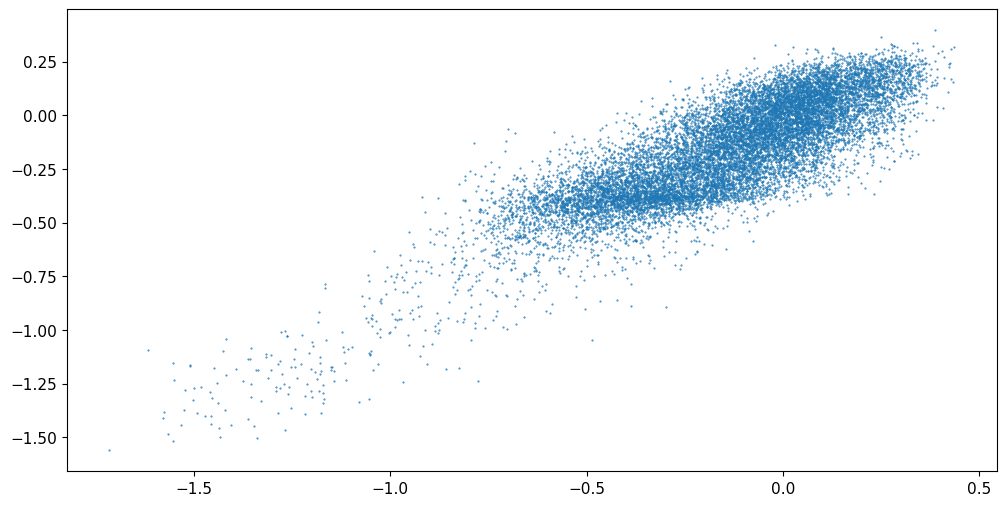

In [27]:
# mses = (test_reconstruction - test_labels)[:,0]

plt.figure(figsize = (12, 6))
plt.scatter(test_labels[:,0], test_reconstruction[:,0], s=0.2)
# plt.ylim(bottom=0., top=0.1)

(Text(0.5, 0, 'Original'), Text(0, 0.5, 'Reconstructed'))

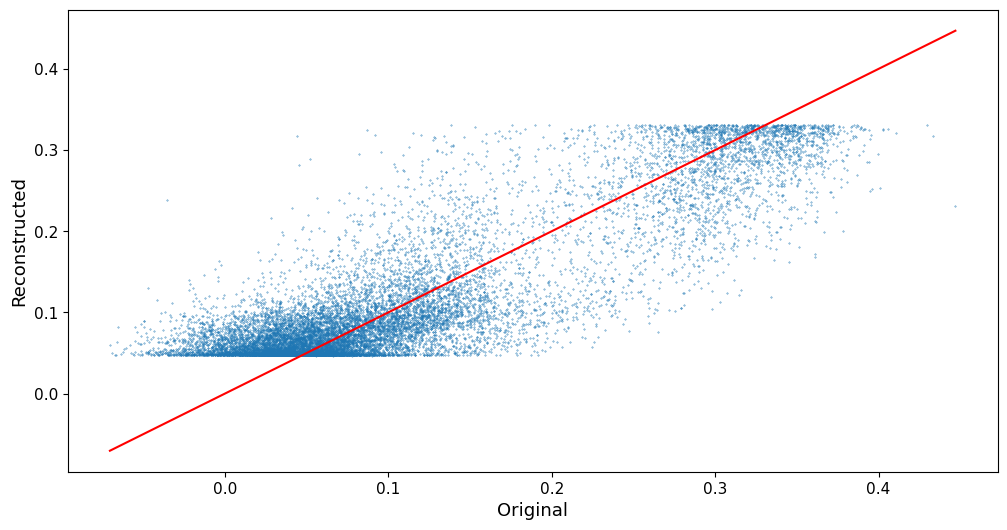

In [28]:
ind = 5  # 19 parameters, 0 to 18
samp_rate = 1

plt.figure(figsize = (12, 6))
plt.scatter(test_labels[:,ind][::samp_rate], test_reconstruction[:,ind][::samp_rate], s=0.1)#, xerr=np.exp(test_labels[:,ind+19][::samp_rate]/2), yerr=np.exp(test_reconstruction[:,ind+19][::samp_rate]/2), fmt='.', markersize=5, elinewidth=0.5)
# plt.plot(np.linspace(0., 0.3, int(1e4)), np.linspace(0., 0.3, int(1e4)), c='r')
plt.plot(np.linspace(np.min(test_labels[:,ind]), np.max(test_labels[:,ind]), int(1e5)), np.linspace(np.min(test_labels[:,ind]), np.max(test_labels[:,ind]), int(1e5)), c='r')
plt.xlabel('Original'), plt.ylabel('Reconstructed')
# plt.xlim(-0.5, 0.4)
# plt.ylim(-0.5, 0.4)

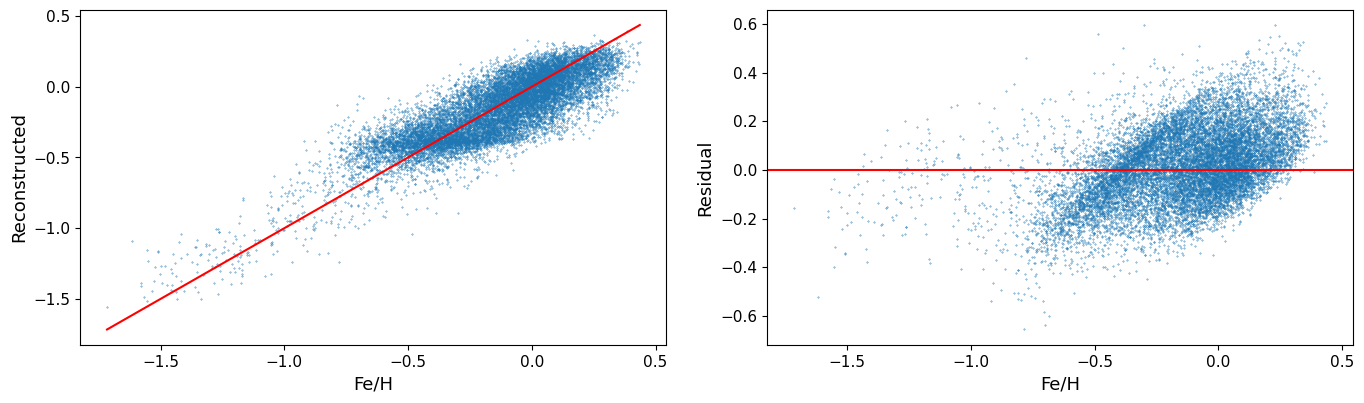

In [29]:
import matplotlib as mpl
plt.rc('font', size=18)

ind=0

fig = plt.figure(figsize = (14, 8))
# ax = fig.add_subplot(111)    # The big subplot
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
# ax2 = fig.add_subplot(223)
# ax3 = fig.add_subplot(224)
# plot the metallicity
ax0.scatter(test_labels[:,ind], test_reconstruction[:,ind], s=0.1)
ax0.plot(np.linspace(np.min(test_labels[:,ind]), np.max(test_labels[:,ind]), int(1e5)), np.linspace(np.min(test_labels[:,ind]), np.max(test_labels[:,ind]), int(1e5)), c='r')
ax0.set_xlabel('Fe/H'), ax0.set_ylabel('Reconstructed')
# plot the residuals of metallicity
# ax1.hist2d(test_labels[:,ind], test_labels[:,ind] - test_reconstruction[:,ind], norm=mpl.colors.LogNorm(), bins=200)
ax1.scatter(test_labels[:,ind], test_labels[:,ind] - test_reconstruction[:,ind], s=0.1)
ax1.set_xlabel(r'Fe/H'), ax1.set_ylabel('Residual')
# ax1.scatter(test_labels[:,ind], test_labels[:,ind] - test_reconstruction[:,ind], s=0.1)
ax1.axhline(0, c='r')
plt.tight_layout()
plt.savefig('metallicity_original_vs_reconstructed_naive.png')

In [30]:
np.std(test_labels[:,ind] - test_reconstruction[:,ind])

0.15057251

Plot:

TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'fmt'

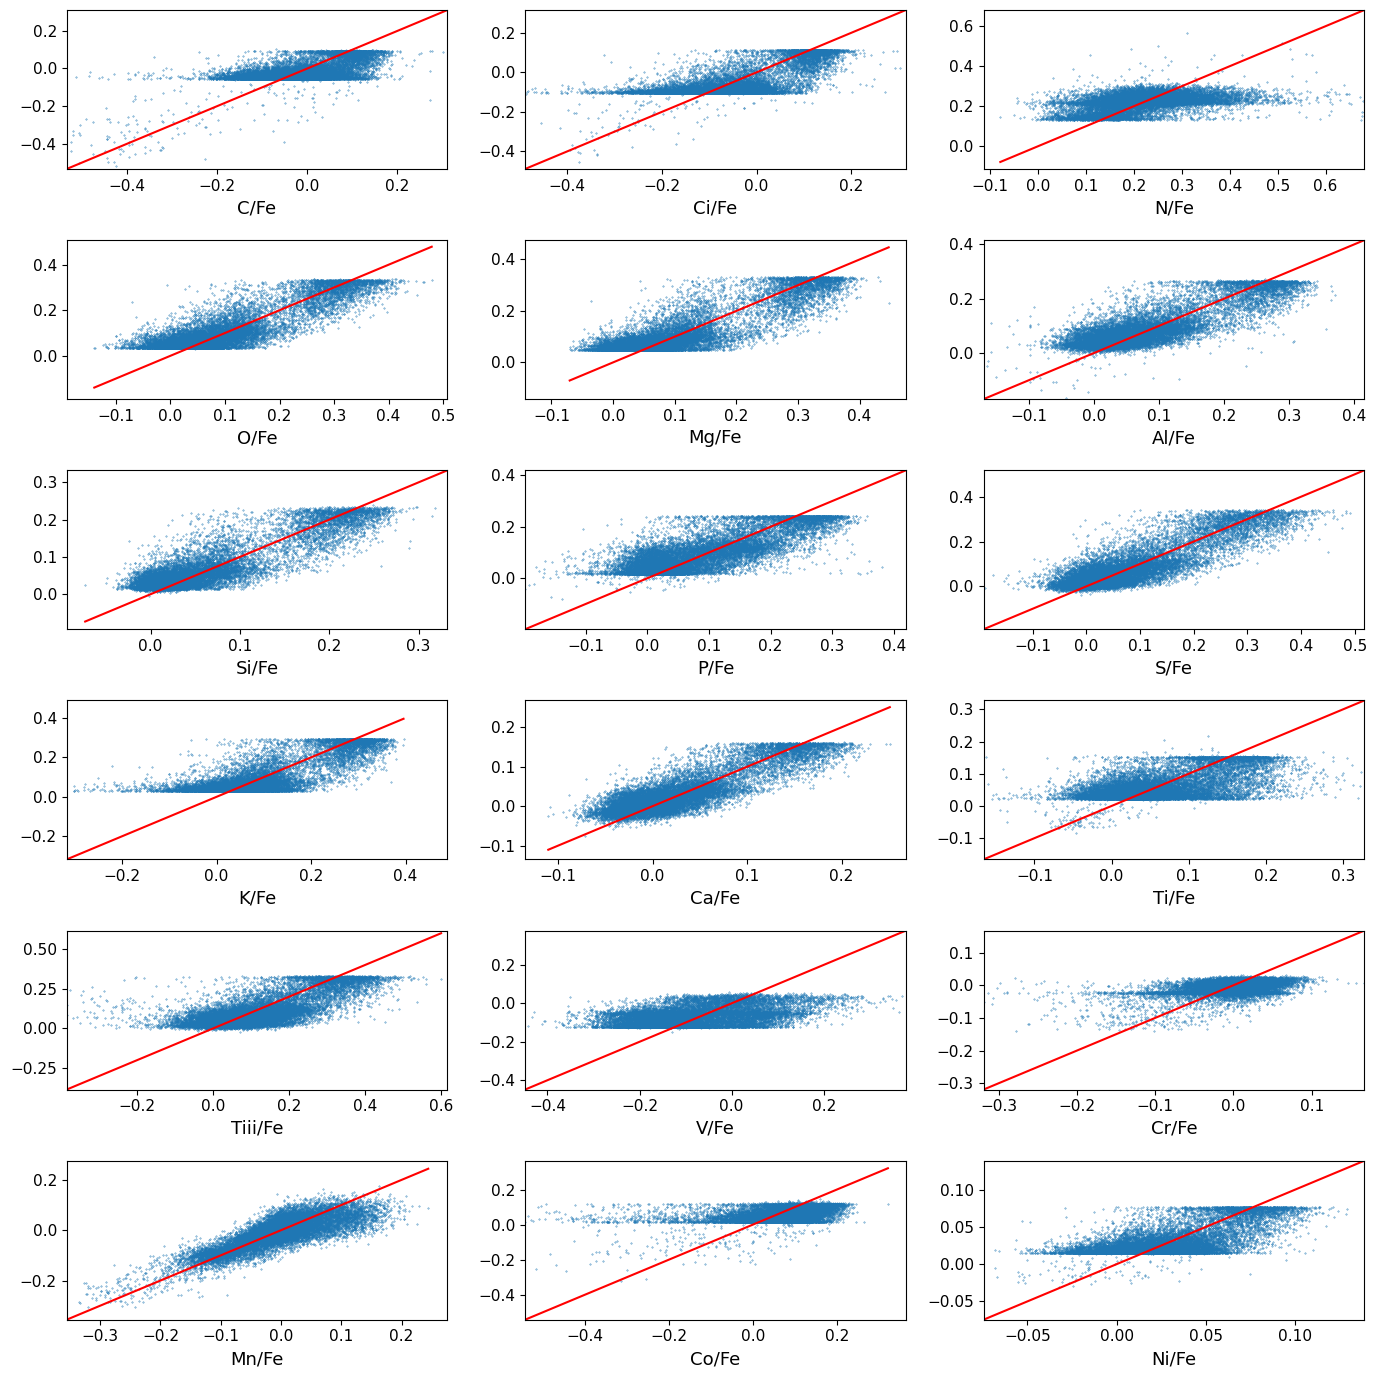

In [31]:
abundances = ['Fe/H', 'C/Fe', 'Ci/Fe', 'N/Fe', 'O/Fe', 'Mg/Fe', 'Al/Fe', 'Si/Fe', 'P/Fe', 'S/Fe', 'K/Fe', 'Ca/Fe', 'Ti/Fe', 'Tiii/Fe', 'V/Fe', 'Cr/Fe', 'Mn/Fe', 'Co/Fe', 'Ni/Fe']
divisor = 4  # fraction of the range to scale the plots by

plt.rc('font', size=14)
fig, ax = plt.subplots(6, 3, figsize=(14, 14))
for i in range(6):
    for j in range(3):
        ax[i, j].scatter(test_labels[:,3*i+j+1][::samp_rate], test_reconstruction[:,3*i+j+1][::samp_rate], s=0.1)
        # plt.plot(np.linspace(0., 0.3, int(1e4)), np.linspace(0., 0.3, int(1e4)), c='r')
        ax[i, j].plot(np.linspace(np.min(test_labels[:,3*i+j+1]), np.max(test_labels[:,3*i+j+1]), int(1e5)), 
                      np.linspace(np.min(test_labels[:,3*i+j+1]), np.max(test_labels[:,3*i+j+1]), int(1e5)), c='r')
        ax[i, j].set_xlabel(abundances[3*i+j+1])# , ax[i, j].set_ylabel('Reconstructed')       
        # scale it properly based on reconstruction
        abundance_min, abundance_max = np.quantile(test_labels[:,3*i+j+1], (0.005, 0.995))
        # abundance_min = np.min(test_reconstruction[:, 3*i + j])
        # abundance_max = np.max(test_reconstruction[:, 3*i + j])
        diff = np.abs(abundance_max - abundance_min)
        # scale it
        ax[i, j].set_xlim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        ax[i, j].set_ylim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        
plt.tight_layout()
plt.savefig('original_vs_reconstructed_naive_all.png', fmt='png')
plt.show()

In [ ]:
plt.scatter(test_labels[:,17], (test_labels[:,17] - test_reconstruction[:, 17]), s=0.1)